# Module 4 Problem Set - Solutions File
Find the solutions to the Problem Set below. Note that there are multiple ways to accomplish the same outcome! If you get the same results as these cells in a different manner, you're doing great. In addition I've included comments describing in more detail what the code I wrote is doing. 

The goals of this problem set are to demonstrate common data cleaning methods and problems and provide an example of some basic plotting that can be used to perform Exploratory Data Analysis.

**IMPORTANT**: If you are running this Problem Set in Google Colab, make sure you are doing so by cloning the Problem Set's GitHub repository. This is done by opening [Google Colab](https://colab.research.google.com/), clicking the "GitHub" tab, and then inputting the URL to the GitHub for the Problem Set: 

*Credit*: the strep_tb dataset was sourced from R's [medicaldata](https://github.com/higgi13425/medicaldata/tree/master) package and converted to csv using `pyreadr`.

## Data Cleaning and Wrangling

In [1]:
# import necessary library/libraries for loading csv files
import pandas as pd  # Pandas provides the easiest implementation for reading csv files

In [2]:
# import the dataset "EHR_sample.csv" into a variable named ehr_data, then display the contents of ehr_data
#   (Note that the data starts on the third line)
ehr_data = pd.read_csv("data/EHR_sample.csv", header=2)  # The header keyword argument tells pandas to start reading from the 3rd line
ehr_data

,Patient Age,blood_pressure,height,weight,temperature,physician_notes
0,24,132/76,NaN,178 lbs,97.0,Patient presenting with sharp lower back pain ...
1,07/22/00,115/62,71.0,83 kg,98.3,"Patient complaining of sore throat, tested pos..."
2,43,121/82,65.0,190 lbs,101.8,Patient presenting with high fever and lack of...
3,18,0/0,66.0,145 lbs,97.5,Patient reports feeling ‘tired’ and having con...
4,01/18/72,140/85,60.0,68 kg,NaN,Routine checkup – nothing abnormal.


**What are some of the issues you see with this data?** (There should be at least 3 things)

There are lots of incorrect things you can mention about the data here, but the 4 major ones are:
1) `Patient Age` is measured *inconsitently* - 3 of the 5 datapoints have age and 2 have birthdays.
2) Some data appear to be *intentionally* incorrect: a blood pressure of 0/0 is not possible
3) Some `height` and `temperature` datapoints are *missing*.
4) Data in `weight` in measured on *different scales*: some in kg and some lbs (could lump this in with 1 if you want)

**How would you fix these issues?** (There are many viable options, make sure you provide *reasoning* for why you choose )

In order:
1) Convert all the items in `Patient Age` to age using the information at the top of the file
2) Use data provided in `physician notes` to aid in fixing the incorrect BP measurement
3) While you can *drop* the data from these columns when performing analysis, this will result in a dataset of only 3 patients. If you know that this sample is a smaller version of a larger dataset then dropping them may not have an adverse affect. However, it may be worth replacing these terms with the average or median if we only have thse 5 datapoints.
4) Convert the different weight measurements to the same scale!

In [3]:
# Clean the data by fixing at least 2 of the issues you found above
## I will fix all 4 here - some are "easier" than others


## 1: Convert Age 
## I have a "pure python" solution here, using the builtin module datetime. Pandas also has some date methods as well
import datetime   

def calculate_age(birthday: str):
    ehr_date = datetime.date.fromisoformat('2023-09-01')  # This converts into a "date" object from the calendar date in line 2 of the file
    age_format = '%m/%d/%y'  # This is the format of the days in our EHR 
    birthdate = datetime.datetime.strptime(birthday, age_format)  # This converts to a "date" object as well

    # Logic: age = current year - birth year - 1 if I havent passed my birthday
    # e.g. I was born in 2000 - my age is 2023 - 2000 if we've passed my birthday, otherwise its 2023 - 2000 - 1
    passed_birthday = ((ehr_date.month, ehr_date.day) < (birthdate.month, birthdate.day))  # Tuple comparison goes position by position
    subtraction_value = 0 if passed_birthday else 1

    # Alternative: return ehr_date.year - birthdate.year - ((ehr_date.month, ehr_date.day) < (birthdate.month, birthdate.day))
    return ehr_date.year - birthdate.year - subtraction_value

for index, age in enumerate(ehr_data['Patient Age']):
    if not age.isdigit():
        age = calculate_age(age)
        ehr_data.loc[index, 'Patient Age'] = age
ehr_data

,Patient Age,blood_pressure,height,weight,temperature,physician_notes
0,24,132/76,NaN,178 lbs,97.0,Patient presenting with sharp lower back pain ...
1,22,115/62,71.0,83 kg,98.3,"Patient complaining of sore throat, tested pos..."
2,43,121/82,65.0,190 lbs,101.8,Patient presenting with high fever and lack of...
3,18,0/0,66.0,145 lbs,97.5,Patient reports feeling ‘tired’ and having con...
4,50,140/85,60.0,68 kg,NaN,Routine checkup – nothing abnormal.


In [4]:
# Fix BP measurement from data in note
ehr_data.loc[3, 'blood_pressure'] = '120/80'  # From physician notes
ehr_data

,Patient Age,blood_pressure,height,weight,temperature,physician_notes
0,24,132/76,NaN,178 lbs,97.0,Patient presenting with sharp lower back pain ...
1,22,115/62,71.0,83 kg,98.3,"Patient complaining of sore throat, tested pos..."
2,43,121/82,65.0,190 lbs,101.8,Patient presenting with high fever and lack of...
3,18,120/80,66.0,145 lbs,97.5,Patient reports feeling ‘tired’ and having con...
4,50,140/85,60.0,68 kg,NaN,Routine checkup – nothing abnormal.


In [5]:
# Replace data with average data (reasoning in my explanation for 3)
mean_height = ehr_data.height.mean()
average_human_temp = 98.6  # notes: Nothing abnormal. (This average temp may be outdated, but it's what I remember)
ehr_data.height.fillna(mean_height, inplace=True)  # inplace tells pandas to change the value rather than return a copy
ehr_data.temperature.fillna(average_human_temp, inplace=True)
ehr_data

,Patient Age,blood_pressure,height,weight,temperature,physician_notes
0,24,132/76,65.5,178 lbs,97.0,Patient presenting with sharp lower back pain ...
1,22,115/62,71.0,83 kg,98.3,"Patient complaining of sore throat, tested pos..."
2,43,121/82,65.0,190 lbs,101.8,Patient presenting with high fever and lack of...
3,18,120/80,66.0,145 lbs,97.5,Patient reports feeling ‘tired’ and having con...
4,50,140/85,60.0,68 kg,98.6,Routine checkup – nothing abnormal.


In [6]:
## Convert to lbs (as temperature is already in imperical, might as well
def kg_to_lb(weight_kg: int):
    return int(2.205 * weight_kg)

for index, weight in enumerate(ehr_data['weight']):
    number, scale = weight.split(' ')
    if scale == 'kg':
        weight_lb = kg_to_lb(int(number))
        ehr_data.loc[index, 'weight'] = f'{weight_lb} lbs'

ehr_data

,Patient Age,blood_pressure,height,weight,temperature,physician_notes
0,24,132/76,65.5,178 lbs,97.0,Patient presenting with sharp lower back pain ...
1,22,115/62,71.0,183 lbs,98.3,"Patient complaining of sore throat, tested pos..."
2,43,121/82,65.0,190 lbs,101.8,Patient presenting with high fever and lack of...
3,18,120/80,66.0,145 lbs,97.5,Patient reports feeling ‘tired’ and having con...
4,50,140/85,60.0,149 lbs,98.6,Routine checkup – nothing abnormal.


## Exploratory Data Analysis
Load in the dataset `strep_tb.csv` from the `data` directory into a dataframe `strep_tb`

In [7]:
strep_tb = pd.read_csv('./data/strep_tb.csv')
print(strep_tb.columns.to_numpy())
strep_tb

['patient_id' 'arm' 'dose_strep_g' 'dose_PAS_g' 'gender'
 'baseline_condition' 'baseline_temp' 'baseline_esr' 'baseline_cavitation'
 'strep_resistance' 'radiologic_6m' 'rad_num' 'improved']


,patient_id,arm,dose_strep_g,dose_PAS_g,gender,baseline_condition,baseline_temp,baseline_esr,baseline_cavitation,strep_resistance,radiologic_6m,rad_num,improved
0,1,Control,0,0,M,1_Good,1_<=98.9F/37.2C,2_11-20,yes,1_sens_0-8,6_Considerable_improvement,6,True
1,2,Control,0,0,F,1_Good,3_100-100.9F/37.8-38.2C,2_11-20,no,1_sens_0-8,5_Moderate_improvement,5,True
2,3,Control,0,0,F,1_Good,1_<=98.9F/37.2C,3_21-50,no,1_sens_0-8,5_Moderate_improvement,5,True
3,4,Control,0,0,M,1_Good,1_<=98.9F/37.2C,3_21-50,no,1_sens_0-8,5_Moderate_improvement,5,True
4,5,Control,0,0,F,1_Good,2_99-99.9F/37.3-37.7C,3_21-50,no,1_sens_0-8,5_Moderate_improvement,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,101,Streptomycin,2,0,F,3_Poor,4_>=101F/38.3C,4_51+,yes,3_resist_100+,2_Considerable_deterioration,2,False
103,104,Streptomycin,2,0,M,3_Poor,4_>=101F/38.3C,4_51+,yes,3_resist_100+,5_Moderate_improvement,5,True
104,105,Streptomycin,2,0,F,3_Poor,4_>=101F/38.3C,4_51+,yes,3_resist_100+,2_Considerable_deterioration,2,False
105,106,Streptomycin,2,0,F,3_Poor,4_>=101F/38.3C,4_51+,yes,3_resist_100+,1_Death,1,False


Given that our "result" is found in the `improved` column, create a stacked bar chart comparing the number of patients that improved and didn't improve based on their recieving of a dose of strep_g (located in the `dose_strep_g` column).

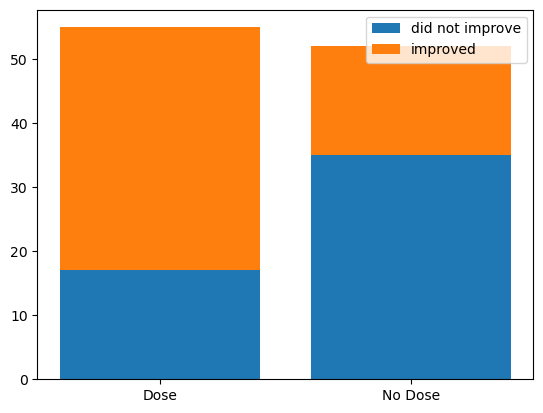

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Count the number of total patients that recieved a dose of strep_g
#     Note 1: In the dataset, these are saved as 0 for no dose and 2 for dose
#     Note 2: The comments are meant to help show what I think is the easiest way to do this
#             and do not necessarily point to the most efficient way of doing this.

# Create a boolean array called which is True when no dose was given and False when a dose was given
## numpy's locigal not does element-wise not (if one value is 0 it returns 1 and if one is non-zero it returns 0)
no_dose = np.logical_not(strep_tb.dose_strep_g)  

# Create two arrays of indices - one where a dose was given and one where it wasnt
## numpy's where will return indices where values are True.
no_dose_idx = np.where(no_dose)[0]             # [0] important here - np.where returns a tuple in this case.
dose_idx = np.where(strep_tb.dose_strep_g)[0]

# Count the total number of patients that recieved/didnt recieve a dose
total_no_dose = len(no_dose_idx)  # len is a built-in "count" - thus numpy doesn't really implement its own count        
total_dose = len(dose_idx)

# Find indices for improved patients
improved_idx = np.where(strep_tb.improved)[0]  # Same as last time we used where!

# Use np.intersect1d to count the number of improved patients that did/didnt recieve a dose
num_improved_no_dose = len(np.intersect1d(improved_idx, no_dose_idx))  # intersect1d just finds the values in common 
num_improved_dose = len(np.intersect1d(improved_idx, dose_idx))

x = ["Dose", "No Dose"]
# Create 2 variables - y1 and y2 with the following values:
# y1 = [number of non-improved patients that recieved a dose, number of non-improved patients that didn't recieve a dose]
# y2 = [number of improved patients that recieved a dose, number of improved patients that didn't recieve a dose]
y1 = [total_dose - num_improved_dose, total_no_dose - num_improved_no_dose]  # total - improved = not improved
y2 = [num_improved_dose, num_improved_no_dose]

plt.bar(x, y1, label='did not improve')
plt.bar(x, y2, bottom=y1, label='improved')
plt.legend()
plt.show()

**Does it look like recieving a dose of strep_g improved patient outcome?**

It does! The proportion of orange to blue in the dose column (i.e. the percentage of patients that improved vs didnt) is much higher than in the no-dose column.

**What other plots may be useful for performing EDA? What kind/kinds of data are present? What do we need to keep in mind when making plots of this data?**

Every column could provide useful insights into the data given an appropriate plot. For example,  looking at a similar bar plot for the doses given of PAS_g, examining the effect of baseline condition. The important thing is recognizing what needs to be done to each column in terms of pre-processing and cleaning to make these plots. Noticing that *all* data in this table is either binary or ordinal is very important - we cannot treat this data as continuous but need to use specific types of charts for ordinal data (see [here](https://towardsdatascience.com/what-plot-why-this-plot-and-why-not-9508a0cb35ea) for a more in-depth explanation)

You don't have to make these plots right now but it may be good practice on your own time to try to make some and reach out if you have issues/need some syntax help! My office hours are 30 minutes after every Friday class on [Zoom](https://ufl.zoom.us/7286265183)
or by appointment through [email](mailto:cox.j@ufl.edu).